In [68]:
import glob
import numpy as np
import pandas as pd
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [69]:
# csv_dirs = glob.glob("data/tests/*.csv")
csv_dirs = glob.glob("data/tests/pre_5x5*.csv")
csv_dirs

sizes = ["5x5", "10x10", "20x20"]
models = ["conv", "pre", "normal"]
trained_fors = [1000, 5000, 10000, 12500, 15000, 25000, 30000, 50000]

csv_dirs_test = []
for model in models:
    for size in sizes:
        for trained_for in trained_fors:
            temp_glob = glob.glob(f"data/tests/{model}_{size}_{str(trained_for)}_*")
            # print(temp_glob)
            csv_dirs_test.extend(temp_glob)
            # print(csv_dirs_test)
        
# trained_for = [1000, 10000]

In [70]:
# csv_dirs[0], csv_dirs[1] = csv_dirs[1], csv_dirs[0]
# csv_dirs[4], csv_dirs[5] = csv_dirs[5], csv_dirs[4]
# csv_dirs[8], csv_dirs[9] = csv_dirs[9], csv_dirs[8]

# csv_dirs
csv_dirs_test
csv_dirs = csv_dirs_test
csv_dirs

['data/tests\\conv_5x5_1000_data.csv',
 'data/tests\\conv_5x5_10000_data.csv',
 'data/tests\\conv_5x5_25000_data.csv',
 'data/tests\\conv_5x5_50000_data.csv',
 'data/tests\\conv_10x10_1000_data.csv',
 'data/tests\\conv_10x10_10000_data.csv',
 'data/tests\\conv_10x10_25000_data.csv',
 'data/tests\\conv_10x10_50000_data.csv',
 'data/tests\\conv_20x20_1000_data.csv',
 'data/tests\\conv_20x20_10000_data.csv',
 'data/tests\\conv_20x20_25000_data.csv',
 'data/tests\\conv_20x20_30000_data.csv',
 'data/tests\\pre_5x5_1000_data.csv',
 'data/tests\\pre_5x5_5000_data.csv',
 'data/tests\\pre_5x5_10000_data.csv',
 'data/tests\\pre_5x5_15000_data.csv',
 'data/tests\\pre_10x10_1000_data.csv',
 'data/tests\\pre_10x10_5000_data.csv',
 'data/tests\\pre_10x10_10000_data.csv',
 'data/tests\\pre_10x10_12500_data.csv',
 'data/tests\\pre_20x20_1000_data.csv',
 'data/tests\\pre_20x20_5000_data.csv',
 'data/tests\\pre_20x20_10000_data.csv',
 'data/tests\\normal_5x5_1000_data.txt',
 'data/tests\\normal_5x5_1000

In [71]:
df = pd.DataFrame()
for file in csv_dirs:
    temp_df = pd.read_csv(file, header=None,names=["score"], index_col=False).iloc[1::]
    temp_df = temp_df.reset_index(drop=True)
    size = file.split("_")[1]
    trained_for = file.split("_")[2]
    model = file.split("_")[0].split("\\")[-1]

    temp_df["model"] = model
    temp_df["size"] = size
    temp_df["trained_for"] = trained_for
    abcd = 10
    df = pd.concat([df, temp_df])
    # print(temp_df.shape)

df = df.reset_index(drop=True)
df["score"] = df["score"].astype(int)
df["model"] = df["model"].astype(str)
df["size"] = df["size"].astype(str)
df["trained_for"] = df["trained_for"].astype(int)

In [72]:
grouped = df.groupby(["model", "size", "trained_for"])
# grouped.describe()



# Statistical Analysis

In [200]:
# data = df[(df["model"] == "conv")]
# st.t.interval(confidence=0.95, df=len(data)-1, scale=st.sem(data))



stats = grouped.agg(["mean","std", "sem"])

confs = []
for val in list(stats.iloc):
    mean, std,  sem = val
    conf = 1.96*sem
    confs.append(f"[{mean-conf}, {mean+conf}]")
    
# df_conf = pd.DataFrame(np.array(confs))
# stats

temp_df = stats.loc["conv",:].iloc[:]
# temp_df["conf"] = df_conf.iloc[:,0]


# df_conf.iloc[:,0]
# temp_df.to_latex()
# confs

# stats.to_csv("stats.csv")
stats.round(3).to_csv("stats.csv")



score             
                           mean    std   sem
model  size  trained_for                    
conv   10x10 1000          0.22   0.45  0.01
             10000         3.19   1.77  0.06
             25000         6.93   3.87  0.12
             50000        10.61   5.28  0.17
       20x20 1000          0.07   0.26  0.01
             10000         1.44   0.99  0.03
             25000         5.77   3.41  0.11
             30000         6.63   4.00  0.13
       5x5   1000          0.64   0.64  0.02
             10000         4.01   1.68  0.05
             25000         6.60   2.98  0.09
             50000         7.96   3.17  0.10
normal 10x10 1000          0.03   0.17  0.01
             10000         0.31   0.51  0.02
             25000         0.64   0.58  0.02
             50000         0.85   0.58  0.02
       20x20 1000          0.03   0.17  0.01
             10000         0.04   0.19  0.01
             25000         0.09   0.31  0.01
             50000         0.13   0.35  0.01
       5x5   1000          0.25   0.55  0.02
             10000         8.72   3.31  0.10
             25000         9.87   2.87  0.09
             50000        10.35   2.74  0.09
pre    10x10 1000          9.07   2.76  0.09
             5000         11.04   1.40  0.04
             10000        34.75   7.34  0.23
             12500        35.65   7.10  0.22
       20x20 1000          6.10   1.51  0.05
             5000          4.06   0.28  0.01
             10000        77.25  16.72  0.53
       5x5   1000          8.84   2.37  0.07
             5000          8.74   1.48  0.05
             10000        12.84   3.12  0.10
             15000        14.07   3.44  0.11

# Plots

In [ ]:
# px.histogram(df, x="conv_10000", nbins=20, title="conv_10000")

# df.mean()
# plt.ion()
# plt.plot(df.mean())
# fig = px.line(df.mean(), title="Mean of all tests")
# fig.update_layout(showlegend=False)
# sorted(csv_dirs)

In [87]:
# px.histogram(df, x="trained_for", y="score", color="model", title="Score vs iterations trained", facet_col="size", facet_col_wrap=3, histfunc='avg', nbins=10)
# px.line(df, x="trained_for", y="score", color="model", title="Score vs iterations trained", facet_col="size", facet_col_wrap=3)

# stats




score
model  size  trained_for           
conv   10x10 1000          0.219000
             10000         3.192000
             25000         6.928000
             50000        10.608000
       20x20 1000          0.073000
             10000         1.443000
             25000         5.774000
             30000         6.626000
       5x5   1000          0.641000
             10000         4.010000
             25000         6.605000
             50000         7.959000
normal 10x10 1000          0.030030
             10000         0.305305
             25000         0.636637
             50000         0.848849
       20x20 1000          0.029029
             10000         0.037037
             25000         0.089089
             50000         0.132132
       5x5   1000          0.247247
             10000         8.716717
             25000         9.869870
             50000        10.353353
pre    10x10 1000          9.070000
             5000         11.039000
             10000        34.751000
             12500        35.652000
       20x20 1000          6.105000
             5000          4.055000
             10000        77.246000
       5x5   1000          8.844000
             5000          8.743000
             10000        12.842000
             15000        14.073000

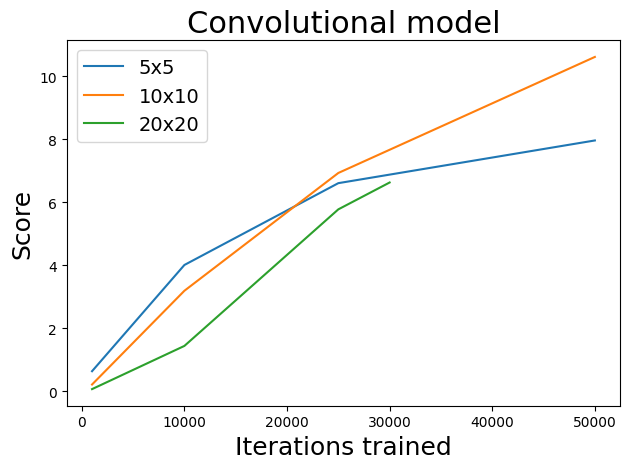

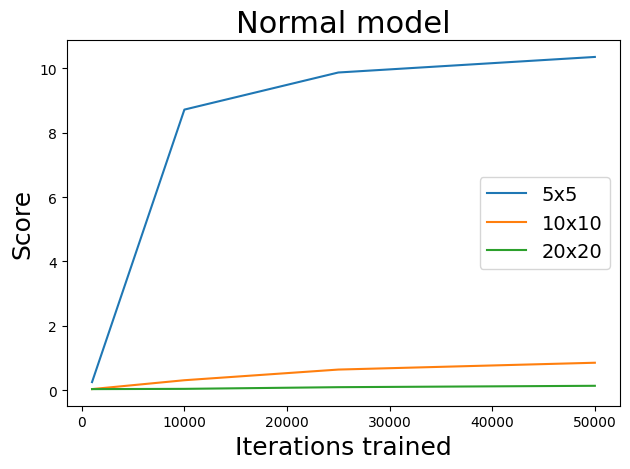

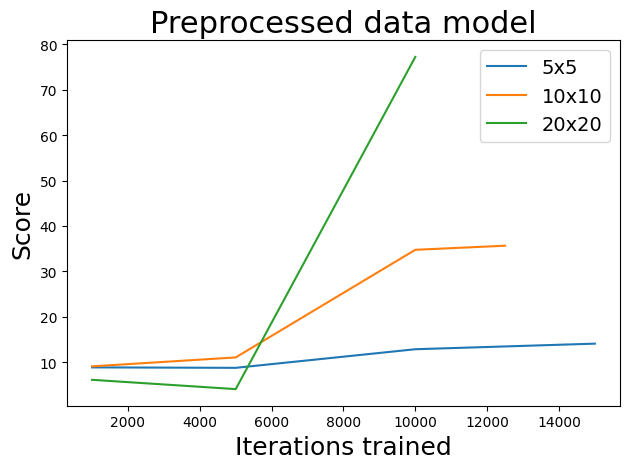

In [102]:

fig1 = plt.figure(1)
plt.plot(grouped.mean().loc["conv", "5x5"], label="5x5")
plt.plot(grouped.mean().loc["conv", "10x10"], label="10x10")
plt.plot(grouped.mean().loc["conv", "20x20"], label="20x20")
plt.legend(fontsize=14)
plt.title("Convolutional model", fontsize=22)
plt.xlabel("Iterations trained", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.tight_layout()
# plt.show()

fig2 = plt.figure(2)
plt.plot(grouped.mean().loc["normal", "5x5"], label="5x5")
plt.plot(grouped.mean().loc["normal", "10x10"], label="10x10")
plt.plot(grouped.mean().loc["normal", "20x20"], label="20x20")
plt.legend(fontsize=14)
plt.title("Normal model", fontsize=22)
plt.xlabel("Iterations trained", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.tight_layout()

# plt.show()

fig3 = plt.figure(3)
plt.plot(grouped.mean().loc["pre", "5x5"], label="5x5")
plt.plot(grouped.mean().loc["pre", "10x10"], label="10x10")
plt.plot(grouped.mean().loc["pre", "20x20"], label="20x20")
plt.legend(fontsize=14)
plt.title("Preprocessed data model", fontsize=22)
plt.xlabel("Iterations trained", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.tight_layout()


fig1.savefig("plots/conv.png")
fig2.savefig("plots/normal.png")
fig3.savefig("plots/pre.png")


